### Comm Cases

In [24]:
import pandas as pd

In [2]:
import os
import sys
sys.path.insert(0,'/users/sgdbareh/volatile/ECHR_Importance')
import data_preprocessing_COMM as dpc
import json

data_directory = '/users/sgdbareh/volatile/ECHR_Importance/Art_3_Data/'

# Set the directory for the txt files
questions = data_directory +'corpora/communication_phase/questions/'
subject_matter = data_directory + 'corpora/communication_phase/subject_matter/'

df = dpc.data_2_df(questions, subject_matter)

df = dpc.preprocessing(df)

df = dpc.link_outcome_labels(df,label_file='./important_labels.csv',data_directory=data_directory)

df

,Filename,Questions,Subject Matter,appno,source_file,doc_date,importance,key_words_keys
0,001-109309,1. In the light of the applicants’ claims and ...,"The applicants, M.M., his wife and a minor chi...",72861/11,pruned_ADMISSIBILITY_meta.json,2013-09-03,4,350;444;609
1,001-109315,1. Did the applicant have a fair hearing in th...,"The applicant, Mr Aurelian Anghel, is a Romani...",5968/09,pruned_CHAMBER_meta.json,2013-06-25,4,445;40;7;451;425
2,001-109317,1. Has there been a violation of the applicant...,"The applicant, Mr Vladimirs Oderovs, is a Latv...",21979/08,pruned_COMMITTEE_meta.json,2017-06-15,4,451;424;429
3,001-109386,1. Has there been a violation of Article 6 § 1...,"1. The applicant, Mr Victor Sandu, is a Moldov...",16463/08,pruned_CHAMBER_meta.json,2014-02-11,3,445;76;136;14
4,001-109387,Has there been a violation of Article 3 of the...,"1. The applicant, Mr Sergiu Buhaniuc, is a Mol...",56074/10,pruned_CHAMBER_meta.json,2014-01-28,4,350;90;596;193
...,...,...,...,...,...,...,...,...
6990,001-229304,1. Has there been a violation of the applicant...,"The applicants are Italian nationals, living i...",54648/21,pruned_ADMISSIBILITYCOM_meta.json,2024-03-07,4,451;138
6991,001-229359,Has there been a violation of Article 5 § 3 of...,"The applicant’s pre-trial detention, which sta...",9573/23,pruned_ADMISSIBILITYCOM_meta.json,2024-03-21,4,448;138
6992,001-229708,Has the applicant suffered discrimination in t...,The application concerns the refusal to grant ...,19191/19,pruned_ADMISSIBILITYCOM_meta.json,2024-03-21,4,343;138
6993,001-229713,Has the applicant suffered a violation of Arti...,"By a judgment of 29 November 2016, the La Spez...",53715/20,pruned_ADMISSIBILITYCOM_meta.json,2024-03-21,4,445;138


In [3]:
#article 3 keywords
article3 = ['350','89','90','596','620','618','192','193','633','492']

In [5]:
# Load the .json file
with open('/users/sgdbareh/volatile/ECHR_Importance/Art_3_Data/key_labels.json') as f:
    json_data = json.load(f)

# Create a dictionary to map keyword labels to keywords
label_to_keyword = {label: keyword for label,keyword in json_data.items()}


In [6]:
df['key_words_keys'] = df['key_words_keys'].astype(str)

for i in range(len(df)):
    keys = df['key_words_keys'][i].split(';')
    keywords = []
    for key in keys:
        if key in label_to_keyword.keys():
            keywords.append(label_to_keyword[key])
        else: 
            pass
    if 'keywords' not in df.columns:
        df['keywords'] = ''
    df.at[i, 'keywords'] = keywords


In [7]:
df_2 = df[df['keywords'].apply(lambda x: len(x) > 0)]

In [8]:
df_2.head()

,Filename,Questions,Subject Matter,appno,source_file,doc_date,importance,key_words_keys,keywords
0,001-109309,1. In the light of the applicants’ claims and ...,"The applicants, M.M., his wife and a minor chi...",72861/11,pruned_ADMISSIBILITY_meta.json,2013-09-03,4,350;444;609,"[(Art. 3) Prohibition of torture, (Art. 13) Ri..."
1,001-109315,1. Did the applicant have a fair hearing in th...,"The applicant, Mr Aurelian Anghel, is a Romani...",5968/09,pruned_CHAMBER_meta.json,2013-06-25,4,445;40;7;451;425,"[(Art. 6) Right to a fair trial, (Art. 6) Civi..."
2,001-109317,1. Has there been a violation of the applicant...,"The applicant, Mr Vladimirs Oderovs, is a Latv...",21979/08,pruned_COMMITTEE_meta.json,2017-06-15,4,451;424;429,[(Art. 8) Right to respect for private and fam...
3,001-109386,1. Has there been a violation of Article 6 § 1...,"1. The applicant, Mr Victor Sandu, is a Moldov...",16463/08,pruned_CHAMBER_meta.json,2014-02-11,3,445;76;136;14,"[(Art. 6) Right to a fair trial, (Art. 6) Crim..."
4,001-109387,Has there been a violation of Article 3 of the...,"1. The applicant, Mr Sergiu Buhaniuc, is a Mol...",56074/10,pruned_CHAMBER_meta.json,2014-01-28,4,350;90;596;193,"[(Art. 3) Prohibition of torture, (Art. 3) Deg..."


In [9]:
df_2['keyword_num'] = df_2.apply(lambda x: x['key_words_keys'].split(';'), axis=1)

/tmp/ipykernel_46310/3226039370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['keyword_num'] = df_2.apply(lambda x: x['key_words_keys'].split(';'), axis=1)


In [10]:
df_art_3 = df_2[df_2['keyword_num'].apply(lambda x: any(x in article3 for x in x))]

In [11]:
df_art_3['keywords_art_3'] = df_art_3['keyword_num'].apply(lambda x: [i for i in x if i in article3])

/tmp/ipykernel_46310/3969326210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_art_3['keywords_art_3'] = df_art_3['keyword_num'].apply(lambda x: [i for i in x if i in article3])


In [12]:
df_art_3

,Filename,Questions,Subject Matter,appno,source_file,doc_date,importance,key_words_keys,keywords,keyword_num,keywords_art_3
0,001-109309,1. In the light of the applicants’ claims and ...,"The applicants, M.M., his wife and a minor chi...",72861/11,pruned_ADMISSIBILITY_meta.json,2013-09-03,4,350;444;609,"[(Art. 3) Prohibition of torture, (Art. 13) Ri...","[350, 444, 609]",[350]
4,001-109387,Has there been a violation of Article 3 of the...,"1. The applicant, Mr Sergiu Buhaniuc, is a Mol...",56074/10,pruned_CHAMBER_meta.json,2014-01-28,4,350;90;596;193,"[(Art. 3) Prohibition of torture, (Art. 3) Deg...","[350, 90, 596, 193]","[350, 90, 596, 193]"
5,001-109429,1. In the light of the applicant’s claims and ...,The applicant is a national of the Democratic ...,75972/11,pruned_ADMISSIBILITYCOM_meta.json,2014-10-14,4,350;444;609,"[(Art. 3) Prohibition of torture, (Art. 13) Ri...","[350, 444, 609]",[350]
12,001-109439,1. Taking into account the applicant’s medical...,"The applicant, Mr Telman Akopovich Mkhitaryan,...",46108/11,pruned_CHAMBER_meta.json,2013-02-05,4,350;90;193;448;227;474,"[(Art. 3) Prohibition of torture, (Art. 3) Deg...","[350, 90, 193, 448, 227, 474]","[350, 90, 193]"
13,001-109440,1. Did the applicant exhaust domestic remedies...,"The applicant, Mr Nikolay Nikolayevich Ryazano...",44885/06,pruned_ADMISSIBILITYCOM_meta.json,2021-10-19,4,350;448;445;451;444;14;369,"[(Art. 3) Prohibition of torture, (Art. 5) Rig...","[350, 448, 445, 451, 444, 14, 369]",[350]
...,...,...,...,...,...,...,...,...,...,...,...
6963,001-225422,1. Have the applicants been subjected to inhum...,The application concerns the applicant’s ill-t...,54009/21,pruned_ADMISSIBILITYCOM_meta.json,2023-10-12,4,350;138,"[(Art. 3) Prohibition of torture, (Art. 39) Fr...","[350, 138]",[350]
6966,001-225813,1. Has the applicant been subjected to inhuman...,The application concerns an incident that occu...,34039/22,pruned_ADMISSIBILITYCOM_meta.json,2024-02-15,4,350;138,"[(Art. 3) Prohibition of torture, (Art. 39) Fr...","[350, 138]",[350]
6976,001-226519,Was the confinement of the applicant to a rest...,The application concerns the applicant’s confi...,26597/23,pruned_ADMISSIBILITYCOM_meta.json,2024-04-04,4,350;138,"[(Art. 3) Prohibition of torture, (Art. 39) Fr...","[350, 138]",[350]
6978,001-227690,1. Did the material conditions of the applican...,The application concerns the conditions of det...,22144/23,pruned_ADMISSIBILITYCOM_meta.json,2024-04-04,4,444;138;350,"[(Art. 13) Right to an effective remedy, (Art....","[444, 138, 350]",[350]


In [13]:
df_art_3['keywords_art_3_text'] = df_art_3['keywords_art_3'].apply(lambda x: ', '.join([label_to_keyword[key] for key in x if key in label_to_keyword.keys()]))


/tmp/ipykernel_46310/2104580476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_art_3['keywords_art_3_text'] = df_art_3['keywords_art_3'].apply(lambda x: ', '.join([label_to_keyword[key] for key in x if key in label_to_keyword.keys()]))


In [14]:
df_art_3.columns

Index(['Filename', 'Questions', 'Subject Matter', 'appno', 'source_file',
       'doc_date', 'importance', 'key_words_keys', 'keywords', 'keyword_num',
       'keywords_art_3', 'keywords_art_3_text'],
      dtype='object')

In [15]:
df_art_3 = df_art_3[['Filename', 'Questions', 'Subject Matter', 'appno','source_file','doc_date','importance','keywords_art_3','keywords_art_3_text']]

In [16]:
# Communicated cases data

df_art_3

,Filename,Questions,Subject Matter,appno,source_file,doc_date,importance,keywords_art_3,keywords_art_3_text
0,001-109309,1. In the light of the applicants’ claims and ...,"The applicants, M.M., his wife and a minor chi...",72861/11,pruned_ADMISSIBILITY_meta.json,2013-09-03,4,[350],(Art. 3) Prohibition of torture
4,001-109387,Has there been a violation of Article 3 of the...,"1. The applicant, Mr Sergiu Buhaniuc, is a Mol...",56074/10,pruned_CHAMBER_meta.json,2014-01-28,4,"[350, 90, 596, 193]","(Art. 3) Prohibition of torture, (Art. 3) Degr..."
5,001-109429,1. In the light of the applicant’s claims and ...,The applicant is a national of the Democratic ...,75972/11,pruned_ADMISSIBILITYCOM_meta.json,2014-10-14,4,[350],(Art. 3) Prohibition of torture
12,001-109439,1. Taking into account the applicant’s medical...,"The applicant, Mr Telman Akopovich Mkhitaryan,...",46108/11,pruned_CHAMBER_meta.json,2013-02-05,4,"[350, 90, 193]","(Art. 3) Prohibition of torture, (Art. 3) Degr..."
13,001-109440,1. Did the applicant exhaust domestic remedies...,"The applicant, Mr Nikolay Nikolayevich Ryazano...",44885/06,pruned_ADMISSIBILITYCOM_meta.json,2021-10-19,4,[350],(Art. 3) Prohibition of torture
...,...,...,...,...,...,...,...,...,...
6963,001-225422,1. Have the applicants been subjected to inhum...,The application concerns the applicant’s ill-t...,54009/21,pruned_ADMISSIBILITYCOM_meta.json,2023-10-12,4,[350],(Art. 3) Prohibition of torture
6966,001-225813,1. Has the applicant been subjected to inhuman...,The application concerns an incident that occu...,34039/22,pruned_ADMISSIBILITYCOM_meta.json,2024-02-15,4,[350],(Art. 3) Prohibition of torture
6976,001-226519,Was the confinement of the applicant to a rest...,The application concerns the applicant’s confi...,26597/23,pruned_ADMISSIBILITYCOM_meta.json,2024-04-04,4,[350],(Art. 3) Prohibition of torture
6978,001-227690,1. Did the material conditions of the applican...,The application concerns the conditions of det...,22144/23,pruned_ADMISSIBILITYCOM_meta.json,2024-04-04,4,[350],(Art. 3) Prohibition of torture


In [17]:
df_art_3['Subj_Count'] = df_art_3['Subject Matter'].str.split().str.len()

/tmp/ipykernel_46310/4232643394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_art_3['Subj_Count'] = df_art_3['Subject Matter'].str.split().str.len()


In [18]:
df_art_3 = df_art_3[df_art_3['Subj_Count'] >= 50]

### Outcome Cases

In [19]:
data_directory = '/users/sgdbareh/volatile/ECHR_Importance/Art_3_Data/corpora/article3'

In [20]:
list_files = []

for folder in os.listdir(data_directory):

    subfolder = data_directory + '/' + folder

    for file in os.listdir(subfolder):
        list_files.append(subfolder+'/'+file)

In [21]:
facts_list = []
law_list = []

for file in list_files:
    
    if file.split('/')[-1] == 'fact_section':
        for text_file in os.listdir(file):
            with open(file + '/' + text_file,'r') as text:
                data = [text_file, text.read()]
            facts_list.append(data)

    else:
        for text_file in os.listdir(file):
            with open(file + '/' + text_file,'r') as text:
                data = [text_file, text.read()]
            law_list.append(data)


In [25]:
facts_df = pd.DataFrame(facts_list,columns=['Filename','Facts'])
law_df = pd.DataFrame(law_list,columns=['Filename','The Law'])

In [26]:
facts_df['Filename'] = facts_df['Filename'].str.replace('.txt', '')
law_df['Filename'] = law_df['Filename'].str.replace('.txt', '')
facts_df['Facts'] = facts_df['Facts'].str.strip()
law_df['The Law'] = law_df['The Law'].str.strip()
facts_df['Facts'] = facts_df['Facts'].str.replace('\n', '')
law_df['The Law'] = law_df['The Law'].str.replace('\n', '')

In [27]:
facts_df['Word Count'] = facts_df['Facts'].str.split().str.len()

<Axes: ylabel='Frequency'>

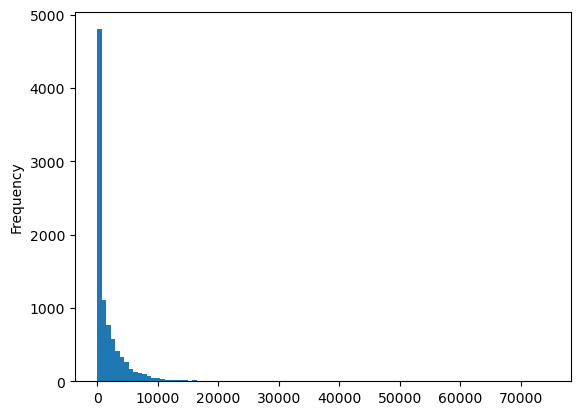

In [28]:
facts_df['Word Count'].plot(kind='hist',bins=100)

In [29]:
df_merged = pd.merge(facts_df, law_df, on='Filename',how='inner')

In [30]:
df_merged = df_merged[df_merged['Word Count'] >=60]

In [31]:
df_merged['date'] = df_merged['Filename'].str.split('_').str[0]
df_merged['File'] = df_merged['Filename'].str.split('_').str[1]

In [32]:
df_merged['date'] = pd.to_datetime(df_merged['date'], format='%Y-%m-%d')

In [77]:
df_merged = df_merged[df_merged['date'] >= '1995-01-01']

In [78]:
df_merged

,Filename,Facts,Word Count,The Law,date,File
28,1997-12-09_001-67704,"The applicant, born in 1956, is a Turkish citi...",272,1. The applicant complains under Article 5 par...,1997-12-09,001-67704
29,1998-12-01_001-4840,The applicant is a British citizen born in 195...,850,1. The applicant complains that the reviews by...,1998-12-01,001-4840
30,1998-12-01_001-4894,The applicant is a British citizen born in 196...,2233,The applicant complains that he has not been a...,1998-12-01,001-4894
31,1998-12-08_001-4497,"The applicant, born in 1955, is a citizen of S...",803,The applicant complains under Article 3 of the...,1998-12-08,001-4497
32,1999-01-19_001-4507,"The applicant, born in 1974, is a citizen of M...",935,1. The applicant complains that his deportatio...,1999-01-19,001-4507
...,...,...,...,...,...,...
9101,2021-12-07_001-214330,10. The applicant was born in 1985 and now res...,12338,ALLEGED VIOLATION OF ARTICLE 3 OF THE CONVENTI...,2021-12-07,001-214330
9102,2022-04-29_001-217061,THE CIRCUMSTANCES OF THE CASE11. The applicant...,10107,ALLEGED VIOLATION OF ARTICLE 3 OF THE CONVENTI...,2022-04-29,001-217061
9103,2022-11-03_001-220484,"THE CIRCUMSTANCES OF THE CASE6. The applicant,...",6764,ALLEGED VIOLATION OF ARTICLE 3 OF THE CONVENTI...,2022-11-03,001-220484
9104,2023-04-28_001-224629,1. The case originated in an application (no. ...,1131,Legal Framework12. Article 38 of the Conventio...,2023-04-28,001-224629


In [37]:
metadata = pd.DataFrame(columns=['itemid','appno','doctypebranch','respondent','decisiondate','extractedappno','conclusion','importance','kpthesaurus','judgementdate'])

#doctypebranch = admissibility etc
#respondent = country
#appno = application number
#item_id = unique id
#decisiondate = date of decision
#judgementdate = date of judgement
#extractedappno = citations (need to exclude actual appno/s of case)
#conclusion = outcome
#importance = importance
#kpthesaurus = keywords

for file in os.listdir('/users/sgdbareh/volatile/ECHR_Importance/raw_case_metadata'):

    if file.endswith('.json'):
        with open('/users/sgdbareh/volatile/ECHR_Importance/raw_case_metadata' + '/' + file) as f:
            data = pd.read_json(f,lines=True)

        metadata = pd.concat([metadata,data])

                

In [38]:
metadata.reset_index(drop=True,inplace=True)

In [39]:
filtered_metadata = metadata.iloc[:, :10]

In [40]:
filtered_metadata['judgementdate'] =  pd.to_datetime(filtered_metadata['judgementdate'],format='%d/%m/%Y %H:%M:%S').dt.date
filtered_metadata['decisiondate'] =  pd.to_datetime(filtered_metadata['decisiondate'],format='%d/%m/%Y %H:%M:%S').dt.date

In [41]:
filtered_metadata['decisiondate'] = pd.to_datetime(filtered_metadata['decisiondate'])
filtered_metadata['judgementdate'] = pd.to_datetime(filtered_metadata['judgementdate'])

In [42]:
filtered_df = filtered_metadata[(filtered_metadata['decisiondate'].dt.date.notnull()) & (filtered_metadata['judgementdate'].dt.date.notnull())]
filtered_df

,itemid,appno,doctypebranch,respondent,decisiondate,extractedappno,conclusion,importance,kpthesaurus,judgementdate
7202,001-81897,21085/02,ADMISSIBILITY,TUR,2006-06-22,21085/02,Partly inadmissible,4,350;444;448;445;440,2007-04-12
9898,001-71906,63378/00,ADMISSIBILITY,RUS,2003-04-29,63378/00;44558/98,Partly admissible;Partly inadmissible,4,350;448;445,2005-01-20
36064,001-70377,24919/03,CHAMBER,NLD,2005-09-08,24919/03;25498/94;37040/02;46827/99;46951/99;2...,Violation of Art. 3 (certain aspects);No viola...,1,183;498;350;193;216,2005-09-29
36074,001-69672,36220/97,CHAMBER,TUR,2002-01-17,36220/97;1998/80;1998/81;1999/68;2001/72;2001/...,Violation of Art. 6-1;Non-pecuniary damage - f...,1,445;7;41;101;113;406;441;216,2005-07-12
36076,001-69614,2345/02,CHAMBER,NLD,2004-10-05,2345/02;45276/99;38865/02;39652/98;40035/98;67...,Violation of Art. 3;No separate issue under Ar...,1,350;90;193;492;216;449,2005-07-05
...,...,...,...,...,...,...,...,...,...,...
66430,001-72934,64897/01,GRANDCHAMBER,ITA,2003-11-20,64897/01;28114/95;62361/00;64699/01;64705/01;6...,Preliminary objection dismissed (Article 35-1 ...,2,445;40;7;406;183;498;14;128;216;577;283,2006-03-29
66431,001-72932,64705/01,GRANDCHAMBER,ITA,2003-11-20,64705/01;62361/00;64886/01;64699/01;64890/01;6...,Preliminary objection dismissed (Article 35-1 ...,2,445;40;7;406;183;498;14;128;216;577;283,2006-03-29
66432,001-72936,65102/01,GRANDCHAMBER,ITA,2003-11-18,65102/01;62361/00;64699/01;64705/01;64886/01;6...,Preliminary objection dismissed (Article 35-1 ...,2,445;40;7;406;183;498;14;128;216;577;283,2006-03-29
66433,001-72933,65075/01,GRANDCHAMBER,ITA,2003-11-20,65075/01;62361/00;64699/01;64705/01;64890/01;6...,Preliminary objection dismissed (Article 35-1 ...,2,445;40;7;406;183;498;14;128;216;577;283,2006-03-29


In [43]:
filtered_metadata['judgementdate'] = filtered_metadata['judgementdate'].fillna(filtered_metadata['decisiondate'])

In [44]:
filtered_metadata.drop(['decisiondate'],axis=1,inplace=True)

In [45]:
filtered_metadata.rename(columns={'itemid':'File'},inplace=True)

In [72]:
filtered_metadata.drop_duplicates(subset='File', keep=False, inplace=True)

In [75]:
filtered_metadata = filtered_metadata[filtered_metadata['judgementdate'] >= '1995-01-01']

In [76]:
filtered_metadata

,File,appno,doctypebranch,respondent,extractedappno,conclusion,importance,kpthesaurus,judgementdate
0,001-235252,63403/13,ADMISSIBILITY,UKR,63403/13;40450/04;46852/13;32317/10;75025/01;2...,Inadmissible,4,609;649;14,2024-07-09
1,001-235279,55657/09,ADMISSIBILITY,TUR,55657/09;18369/07;44827/08;651/10;5286/10;4800...,Struck out of the list,4,445;609;649,2024-06-25
2,001-235206,14179/21,ADMISSIBILITY,MLT,14179/21;38358/22;47152/06;10865/09;32250/08;1...,Inadmissible,4,445;444;343;14,2024-06-18
3,001-235122,1106/13,ADMISSIBILITY,ARM,1106/13;17153/11;21881/20;71243/01;38433/09,Inadmissible,4,369;14,2024-06-11
4,001-235004,41678/20,ADMISSIBILITY,UKR,41678/20;8019/16;38677/06;54904/08;6582/16;449...,Inadmissible (Art. 35) Admissibility criteria;...,3,14;398;183;498;369;311,2024-06-04
...,...,...,...,...,...,...,...,...,...
66509,001-58296,33440/96,GRANDCHAMBER,ITA,33440/96;34884/97;34256/96;35284/97;35265/97,Violation of Art. 6-1;Pecuniary damage - claim...,4,445;40;406;216,1999-07-28
66510,001-58258,33124/96,GRANDCHAMBER,NLD,33124/96,Struck out of the list (Article 37-1 - Strikin...,4,449;350;620;609;478;138;165;561,1999-06-22
66511,001-58255,14025/88,GRANDCHAMBER,ITA,14025/88,Pecuniary damage - financial award;Non-pecunia...,4,216;369,1999-06-16
66512,001-58211,24436/94;24582/94;24583/94;24584/94;24895/94;2...,GRANDCHAMBER,GBR,24436/94;24582/94;24583/94;24584/94;24895/94;2...,Violation of Art. 6-1;Pecuniary damage - claim...,4,445;180;181;216,1999-02-18


In [46]:
#merge two dataframes

In [79]:
full_outcome_data = pd.merge(df_merged,filtered_metadata,on='File',how='inner')

In [80]:
full_outcome_data.drop(['Filename','judgementdate'],axis=1,inplace=True)

In [83]:
full_outcome_data

,Facts,Word Count,The Law,date,File,appno,doctypebranch,respondent,extractedappno,conclusion,importance,kpthesaurus
0,"The applicant, born in 1956, is a Turkish citi...",272,1. The applicant complains under Article 5 par...,1997-12-09,001-67704,31859/96,ADMISSIBILITY,TUR,31859/96;22761/93;24722/94;1994/95,Inadmissible,4,448;45;350
1,The applicant is a British citizen born in 195...,850,1. The applicant complains that the reviews by...,1998-12-01,001-4840,40787/98,ADMISSIBILITY,GBR,40787/98;20448/92;15882/89,Partly inadmissible,4,451;429;203;268;329;376;350
2,The applicant is a British citizen born in 196...,2233,The applicant complains that he has not been a...,1998-12-01,001-4894,32340/96,ADMISSIBILITY,GBR,32340/96,Admissible,4,448;438;45;350;192;90
3,"The applicant, born in 1955, is a citizen of S...",803,The applicant complains under Article 3 of the...,1998-12-08,001-4497,44667/98,ADMISSIBILITY,DEU,44667/98,Inadmissible,4,14;128;350;193
4,"The applicant, born in 1974, is a citizen of M...",935,1. The applicant complains that his deportatio...,1999-01-19,001-4507,42367/98,ADMISSIBILITY,SWE,42367/98,Inadmissible,3,350;492;193;90;192;89
...,...,...,...,...,...,...,...,...,...,...,...,...
7666,10. The applicant was born in 1985 and now res...,12338,ALLEGED VIOLATION OF ARTICLE 3 OF THE CONVENTI...,2021-12-07,001-214330,57467/15,GRANDCHAMBER,DNK,57467/15;578/16;353/16;41738/10;17299/12;26565...,No violation of Article 3 - Prohibition of tor...,1,350;620;451;628;429;268;329;333;216;577;283;23...
7667,THE CIRCUMSTANCES OF THE CASE11. The applicant...,10107,ALLEGED VIOLATION OF ARTICLE 3 OF THE CONVENTI...,2022-04-29,001-217061,28492/15;49975/15,GRANDCHAMBER,RUS,28492/15;49975/15;77658/11;49747/11;71386/10;2...,No violation of Article 3 - Prohibition of tor...,1,350;618
7668,"THE CIRCUMSTANCES OF THE CASE6. The applicant,...",6764,ALLEGED VIOLATION OF ARTICLE 3 OF THE CONVENTI...,2022-11-03,001-220484,22854/20,GRANDCHAMBER,GBR,22854/20;140/10;66069/09;9146/07;32650/07;2190...,Struck out of the list (Art. 37) Striking out ...,1,350;89;618;192;609;478
7669,1. The case originated in an application (no. ...,1131,Legal Framework12. Article 38 of the Conventio...,2023-04-28,001-224629,38263/08,GRANDCHAMBER,RUS,38263/08;59532/00;10865/09;40792/10;8019/16;13...,Non-pecuniary damage - award (Article 41 - Non...,1,216;283;577;121;594;26;126;449;595;231;496;350...


In [94]:
full_outcome_data = full_outcome_data[full_outcome_data['kpthesaurus'] != '']

In [97]:
#check all cases are Article 3
full_outcome_data = full_outcome_data[full_outcome_data['kpthesaurus'].apply(lambda x: any(keyword in x for keyword in article3))]
full_outcome_data

,Facts,Word Count,The Law,date,File,appno,doctypebranch,respondent,extractedappno,conclusion,importance,kpthesaurus
0,"The applicant, born in 1956, is a Turkish citi...",272,1. The applicant complains under Article 5 par...,1997-12-09,001-67704,31859/96,ADMISSIBILITY,TUR,31859/96;22761/93;24722/94;1994/95,Inadmissible,4,448;45;350
1,The applicant is a British citizen born in 195...,850,1. The applicant complains that the reviews by...,1998-12-01,001-4840,40787/98,ADMISSIBILITY,GBR,40787/98;20448/92;15882/89,Partly inadmissible,4,451;429;203;268;329;376;350
2,The applicant is a British citizen born in 196...,2233,The applicant complains that he has not been a...,1998-12-01,001-4894,32340/96,ADMISSIBILITY,GBR,32340/96,Admissible,4,448;438;45;350;192;90
3,"The applicant, born in 1955, is a citizen of S...",803,The applicant complains under Article 3 of the...,1998-12-08,001-4497,44667/98,ADMISSIBILITY,DEU,44667/98,Inadmissible,4,14;128;350;193
4,"The applicant, born in 1974, is a citizen of M...",935,1. The applicant complains that his deportatio...,1999-01-19,001-4507,42367/98,ADMISSIBILITY,SWE,42367/98,Inadmissible,3,350;492;193;90;192;89
...,...,...,...,...,...,...,...,...,...,...,...,...
7666,10. The applicant was born in 1985 and now res...,12338,ALLEGED VIOLATION OF ARTICLE 3 OF THE CONVENTI...,2021-12-07,001-214330,57467/15,GRANDCHAMBER,DNK,57467/15;578/16;353/16;41738/10;17299/12;26565...,No violation of Article 3 - Prohibition of tor...,1,350;620;451;628;429;268;329;333;216;577;283;23...
7667,THE CIRCUMSTANCES OF THE CASE11. The applicant...,10107,ALLEGED VIOLATION OF ARTICLE 3 OF THE CONVENTI...,2022-04-29,001-217061,28492/15;49975/15,GRANDCHAMBER,RUS,28492/15;49975/15;77658/11;49747/11;71386/10;2...,No violation of Article 3 - Prohibition of tor...,1,350;618
7668,"THE CIRCUMSTANCES OF THE CASE6. The applicant,...",6764,ALLEGED VIOLATION OF ARTICLE 3 OF THE CONVENTI...,2022-11-03,001-220484,22854/20,GRANDCHAMBER,GBR,22854/20;140/10;66069/09;9146/07;32650/07;2190...,Struck out of the list (Art. 37) Striking out ...,1,350;89;618;192;609;478
7669,1. The case originated in an application (no. ...,1131,Legal Framework12. Article 38 of the Conventio...,2023-04-28,001-224629,38263/08,GRANDCHAMBER,RUS,38263/08;59532/00;10865/09;40792/10;8019/16;13...,Non-pecuniary damage - award (Article 41 - Non...,1,216;283;577;121;594;26;126;449;595;231;496;350...


In [98]:
full_outcome_data.columns

Index(['Facts', 'Word Count', 'The Law', 'date', 'File', 'appno',
       'doctypebranch', 'respondent', 'extractedappno', 'conclusion',
       'importance', 'kpthesaurus'],
      dtype='object')